In [ ]:
from sklearn.datasets import load_iris
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


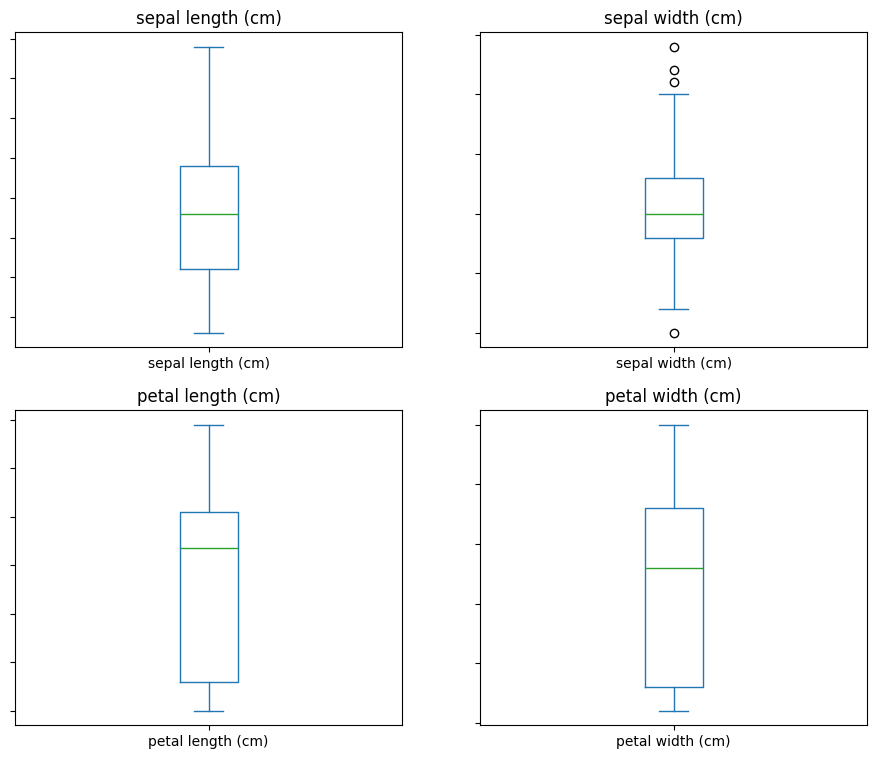

In [ ]:
def boxplot_iris(feature_names, dataset):
  i = 1
  plt.figure(figsize=(11, 9))
  for col in feature_names:
    plt.subplot(2, 2, i)
    plt.axis('on')
    plt.tick_params(axis='both', left=True,
                    top=False, right=False,
                    bottom=True, labelleft=False,
                    labeltop=False, labelright=False,
                    labelbottom=True)
    dataset[col].plot(kind="box", subplots=True, sharex=False)
    plt.title(col)
    i += 1
  plt.show()

boxplot_iris(iris.columns[:], iris)

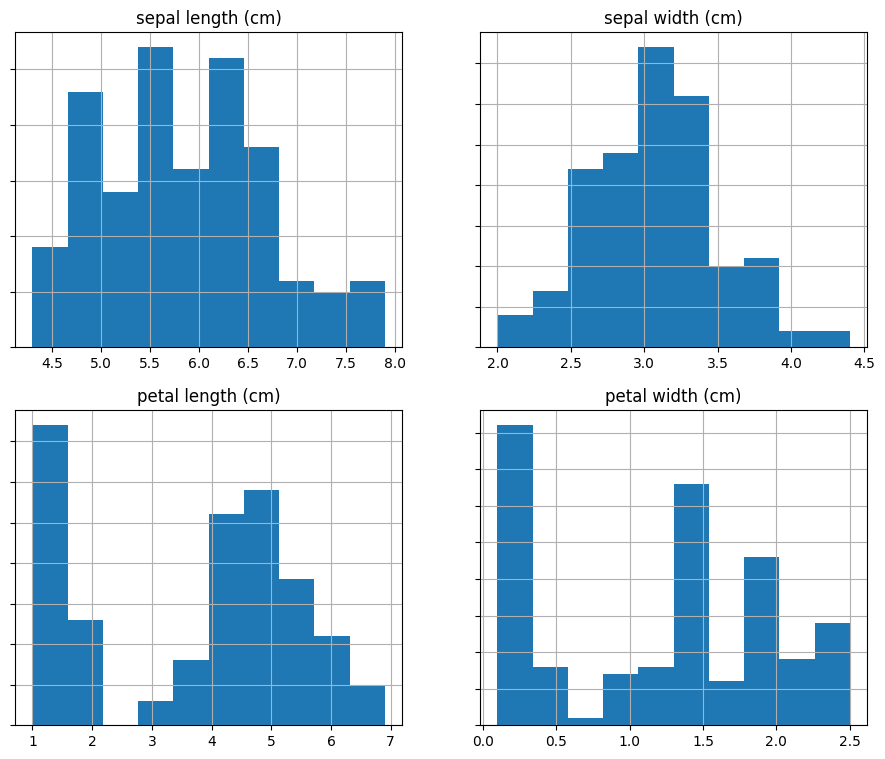

In [ ]:
def histogram_iris(feature_names, dataset):
  i = 1
  plt.figure(figsize=(11, 9))
  for col in feature_names:
    plt.subplot(2, 2, i)
    plt.axis('on')
    plt.tick_params(axis='both', left=True,
                    top=False, right=False,
                    bottom=True, labelleft=False,
                    labeltop=False, labelright=False,
                    labelbottom=True)
    dataset[col].hist()
    plt.title(col)
    i += 1
  plt.show()

histogram_iris(iris.columns[:], iris)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
)

In [ ]:
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
model.score(X_test, y_test)

0.98